In [1]:

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [3]:
words = open('movies.txt', 'r', encoding='utf-8').read().splitlines()
words[:10]

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat',
 'Sabrina',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye']

In [4]:
len(words)


42259

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: ' ', 2: '!', 3: '"', 4: '#', 5: '$', 6: '%', 7: '&', 8: "'", 9: '(', 10: ')', 11: '*', 12: '+', 13: ',', 14: '-', 0: '.', 16: '/', 17: '0', 18: '1', 19: '2', 20: '3', 21: '4', 22: '5', 23: '6', 24: '7', 25: '8', 26: '9', 27: ':', 28: ';', 29: '=', 30: '?', 31: '@', 32: 'A', 33: 'B', 34: 'C', 35: 'D', 36: 'E', 37: 'F', 38: 'G', 39: 'H', 40: 'I', 41: 'J', 42: 'K', 43: 'L', 44: 'M', 45: 'N', 46: 'O', 47: 'P', 48: 'Q', 49: 'R', 50: 'S', 51: 'T', 52: 'U', 53: 'V', 54: 'W', 55: 'X', 56: 'Y', 57: 'Z', 58: '[', 59: ']', 60: '_', 61: 'a', 62: 'b', 63: 'c', 64: 'd', 65: 'e', 66: 'f', 67: 'g', 68: 'h', 69: 'i', 70: 'j', 71: 'k', 72: 'l', 73: 'm', 74: 'n', 75: 'o', 76: 'p', 77: 'q', 78: 'r', 79: 's', 80: 't', 81: 'u', 82: 'v', 83: 'w', 84: 'x', 85: 'y', 86: 'z', 87: '¡', 88: '¢', 89: '£', 90: 'ª', 91: '°', 92: '²', 93: '³', 94: '·', 95: '½', 96: '¿', 97: 'À', 98: 'Á', 99: 'Â', 100: 'Å', 101: 'Æ', 102: 'Ç', 103: 'È', 104: 'É', 105: 'Ö', 106: '×', 107: 'Ú', 108: 'Ü', 109: 'ß', 110: 'à', 111: 'á'

In [6]:
import unicodedata
import re

def clean(word):
    word = unicodedata.normalize('NFKD', word)
    word = word.lower()
    # Keep lowercase letters, digits, spaces, apostrophes, hyphens
    word = re.sub(r"[^a-z0-9 '\-]", '', word)
    return word.strip()

In [7]:
chars = sorted(list(set(''.join(words))))
print(chars)

[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¡', '¢', '£', 'ª', '°', '²', '³', '·', '½', '¿', 'À', 'Á', 'Â', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ö', '×', 'Ú', 'Ü', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ù', 'ú', 'û', 'ü', 'ā', 'ą', 'Ć', 'ć', 'ē', 'ę', 'ě', 'ğ', 'İ', 'ı', 'ł', 'ń', 'ņ', 'œ', 'ś', 'Ş', 'ş', 'Š', 'š', 'ū', 'ů', 'ż', 'Ž', 'ž', 'Α', 'Β', 'Γ', 'Δ', 'Θ', 'Κ', 'Λ', 'Μ', 'Ν', 'Ξ', 'Ο', 'Π', 'Σ', 'Τ', 'Υ', 'Φ', 'ά', 'έ', 'ή', 'ί', 'α', 'γ', 'δ', 'ε', 'η', 'ι', 'κ', 'λ', 'μ', 'ν', 'ο', 'π', 'ρ', 'ς', 'σ', 'τ', 'υ', 'φ', 'χ',

In [8]:
# cleaned_words = [clean(w) for w in words if w.strip() != '']
cleaned_words = [clean(w) for w in words if clean(w).strip() != '']

In [9]:
chars = sorted(list(set(''.join(cleaned_words))))

In [10]:
chars

[' ',
 "'",
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [11]:
chars = sorted(list(set(''.join(cleaned_words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [12]:
stoi

{' ': 1,
 "'": 2,
 '-': 3,
 '0': 4,
 '1': 5,
 '2': 6,
 '3': 7,
 '4': 8,
 '5': 9,
 '6': 10,
 '7': 11,
 '8': 12,
 '9': 13,
 'a': 14,
 'b': 15,
 'c': 16,
 'd': 17,
 'e': 18,
 'f': 19,
 'g': 20,
 'h': 21,
 'i': 22,
 'j': 23,
 'k': 24,
 'l': 25,
 'm': 26,
 'n': 27,
 'o': 28,
 'p': 29,
 'q': 30,
 'r': 31,
 's': 32,
 't': 33,
 'u': 34,
 'v': 35,
 'w': 36,
 'x': 37,
 'y': 38,
 'z': 39,
 '.': 0}

In [15]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(cleaned_words):  
  X, Y = [], []
  for w in cleaned_words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(cleaned_words)
n1 = int(0.8*len(cleaned_words))
n2 = int(0.9*len(cleaned_words))

Xtr, Ytr = build_dataset(cleaned_words[:n1])
Xdev, Ydev = build_dataset(cleaned_words[n1:n2])
Xte, Yte = build_dataset(cleaned_words[n2:])

torch.Size([607647, 3]) torch.Size([607647])
torch.Size([74982, 3]) torch.Size([74982])
torch.Size([74922, 3]) torch.Size([74922])


In [16]:
len(chars)

39

In [17]:
C = torch.randn((40, 2))

In [18]:
emb = C[X]
emb.shape

NameError: name 'X' is not defined

In [19]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([607647, 3]), torch.Size([607647]))

In [20]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((40, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 40), generator=g)
b2 = torch.randn(40, generator=g)
parameters = [C, W1, b1, W2, b2]

In [21]:
sum(p.nelement() for p in parameters) # number of parameters in total


14640

In [22]:
for p in parameters:
  p.requires_grad = True

In [23]:
lri = []
lossi = []
stepi = []

In [24]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 40)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

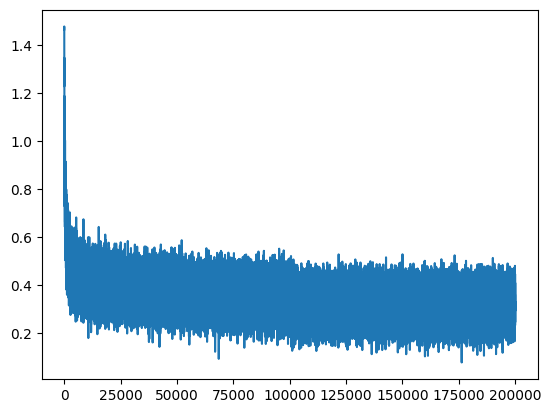

In [25]:
plt.plot(stepi, lossi)


In [26]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1102, grad_fn=<NllLossBackward0>)

In [27]:
emb.shape

torch.Size([607647, 3, 10])

In [28]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1273, grad_fn=<NllLossBackward0>)

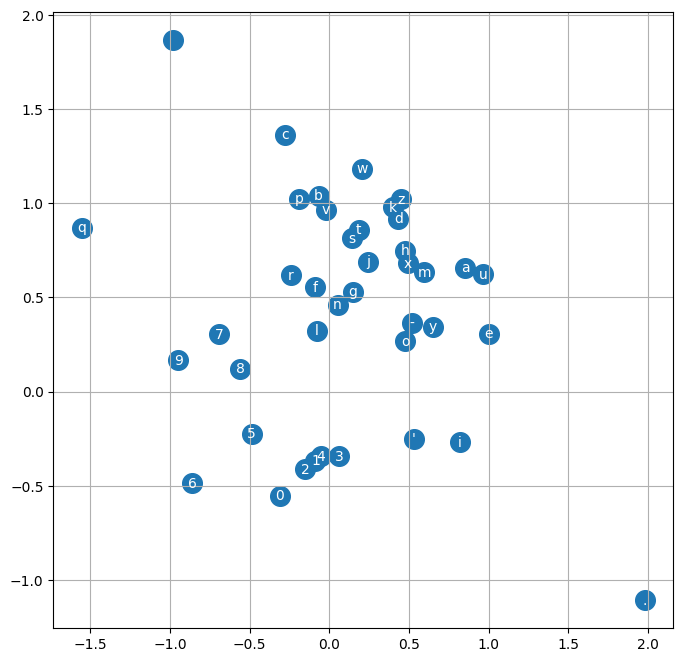

In [29]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [30]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [31]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

ter is lammers.
iat.
al chrisies.
bace nuppiress.
grobbawcy cher the dack end the mise talf thieft melling.
rub.
allywants worher.
like.
planhem 43.
the of sal onel an noveshall rovie and get.
afiant my beckeddakon.
clancret the glatian poon.
redero.
the of the prey flight.
sund for gythis friest.
on tew cossin.
k brot no the sporgasinhpt my.
vatchilesd.
stateck sab gellock stone in the retule.
the bellarixnajbert.
